LAPORAN PRATIKUM Infrastruktur dan Platfrom Sains Data 

Nama : Ersa Amelia

Nim : 2311110009

Lakukan preprocessing dan visualisasi pada data diabetes dengan ketentuan :
1. Imputasi missing value dengan mean, median, dan modus
2. Cek korelasi antar variabel dengan heatmap
3. Lakukan imbalance handling dengan undersampling
4. Lakukan scaling dengan robust scaler dan minmax

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer



In [21]:
df=pd.read_csv(r'C:\Users\User\Downloads\diabetes - diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0      NaN           72.0           35.0      0.0   NaN   
1            1.0     85.0           66.0           29.0      0.0   NaN   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0      NaN           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0      NaN  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0            NaN           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                      627.00   NaN        1  
1                

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [23]:
df.isnull().sum()

Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

In [36]:
# function utk count outlier using IQR
def count_outlier_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return ((data < lower_bound) | (data > upper_bound)).sum()

# count outliers in each numerical column
outliers_counts = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  outliers_counts[col] = count_outlier_iqr(df[col])

# convert the result into a dataframe for easier viewing
outliers_counts_df = pd.DataFrame(list(outliers_counts.items()), columns=['Column', 'Outlier Count'])

# display the outlier counts dataframe
outliers_counts_df

,Column,Outlier Count
0,Pregnancies,4
1,Glucose,4
2,BloodPressure,39
3,SkinThickness,1
4,Insulin,26
5,BMI,14
6,DiabetesPedigreeFunction,0
7,Age,16
8,Outcome,0


In [39]:
mean_imputer = SimpleImputer(strategy='mean')
mean_imputed_data = pd.DataFrame(mean_imputer.fit_transform(df), columns=df.columns)

median_imputer = SimpleImputer(strategy='median')
median_imputed_data = pd.DataFrame(median_imputer.fit_transform(df), columns=df.columns)


mode_imputer = SimpleImputer(strategy='most_frequent')
mode_imputed_data = pd.DataFrame(mode_imputer.fit_transform(df), columns=df.columns)

print("Original DataFrame:")
print(df)

print("\nMean Imputed DataFrame:")
print(mean_imputed_data)

print("\nMedian Imputed DataFrame:")
print(median_imputed_data)

print("\nMode Imputed DataFrame:")
print(mode_imputed_data)

Original DataFrame:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0      NaN           72.0           35.0      0.0   NaN   
1            1.0     85.0           66.0           29.0      0.0   NaN   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0      NaN           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0      NaN  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0            NaN           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                      627.00   NaN        1

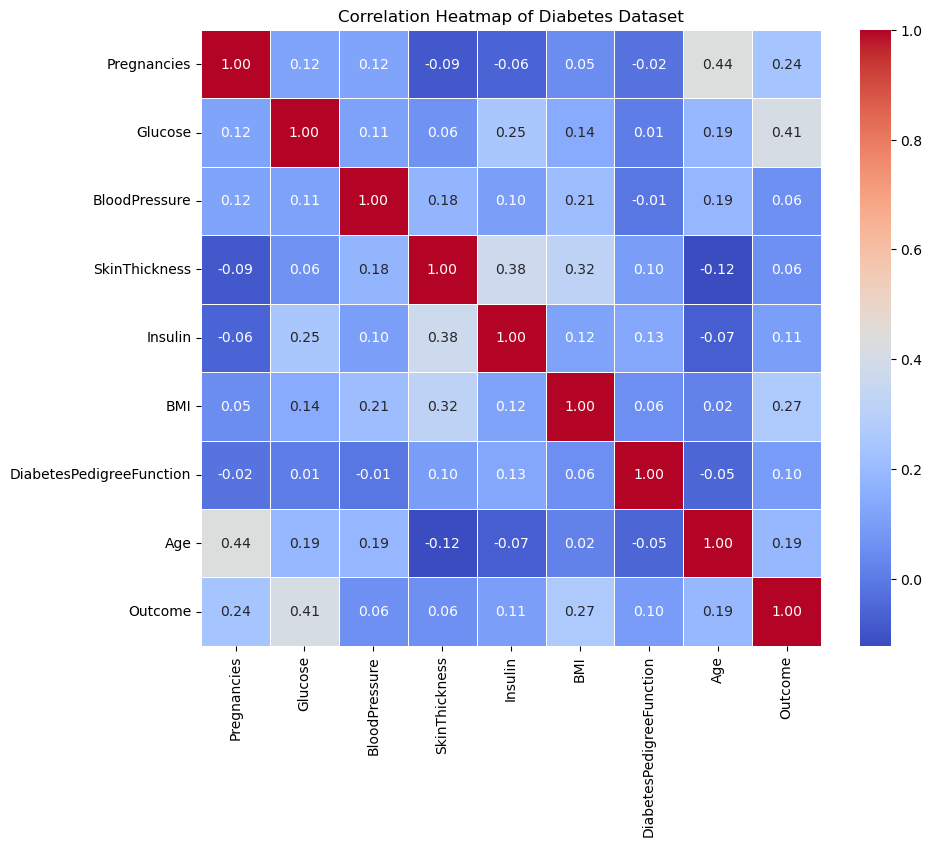

In [40]:
plt.figure(figsize=(10, 8))
correlation_matrix = mean_imputed_data.corr()  # Menggunakan mean-imputed data
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

<Axes: >

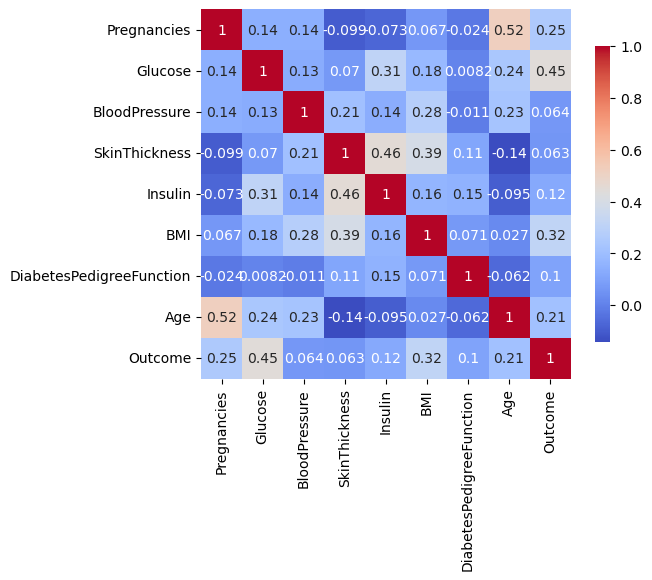

In [41]:

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink":.8})

In [42]:
X = mean_imputed_data.drop('Outcome', axis=1)
y = mean_imputed_data['Outcome']
